# Heart Disease Prediction Analysis By using Machine Learning

## **Made By: Group - 8**
###         Jinny Kapur    (2210990462)
###         Jiya Gaba      (2210990464)
###         Joyash Sood    (2210990466)
###         Kartavya Tomar (2210990484)
        
## **Group - 10**
### **4th Semester (2nd year)**
### **Chitkara University Institute of Engineering and Technology, Punjab**

## Submitted To: 
### **Tushar Khitoliya**
### **Shagun Sharma**



## 1. *Importing the neccessary libraries*

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

## 2. *Reading the Data from CSV file*

In [86]:
dataframe=pd.read_csv("heart.csv")
dataframe.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


## 3. *Data Analysis*

### Let, we get some basic information about the dataset.



In [87]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Now, let us look at whether the dataset has null values or not.

In [88]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### From this output, our data does not contain null values and duplicates. 
### So, the data is good which will be further analyzed.



## 3. *Correlation Matrix*
### Visulaizing the data features to find the correlation between them which will infer the important features.



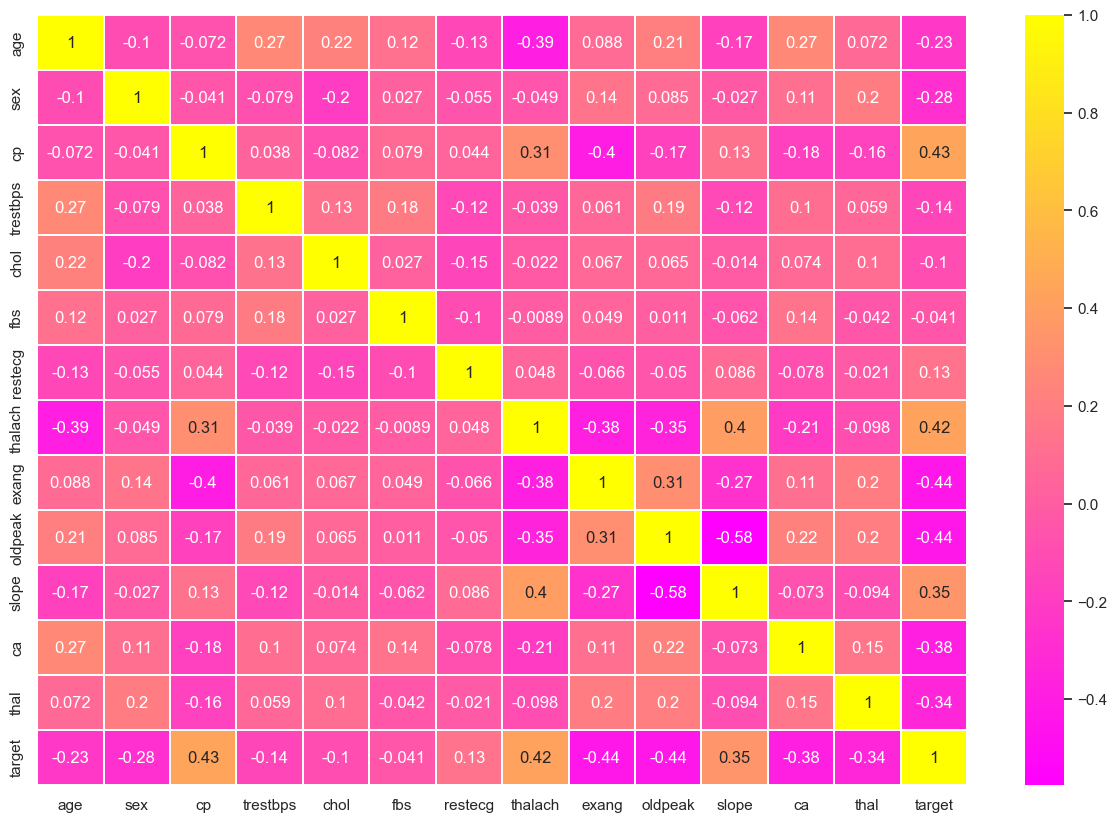

<Figure size 1000x600 with 0 Axes>

In [89]:
plt.figure(figsize=(15,10))
sns.heatmap(dataframe.corr(),linewidth=.01,annot=True,cmap="spring")
plt.show()
plt.savefig('correlationfigure')

### From the above heatmap, we can understand that Chest pain(cp) and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to chest pain, thalach, slope, and resting have a positive correlation with the target.

### Then, exercise-induced angina(exang) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to ca, old peak, thal have a negative correlation with the target.



## *Let us see the relation between each features distribution with the help of histogram.*



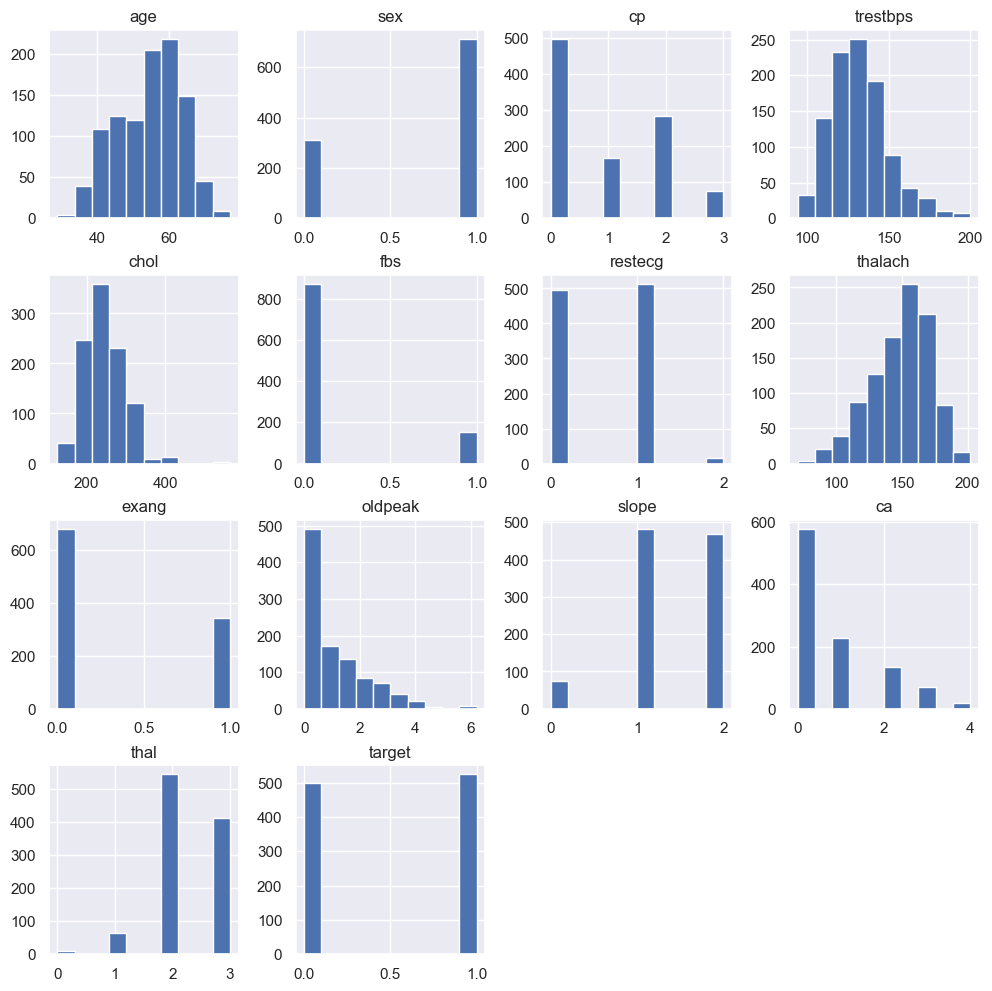

In [90]:
dataframe.hist(figsize=(12,12))
plt.savefig('featuresplot')

## 4. *Train-Test Split*

### We split the whole dataset into trainset and testset which contains 75% train and 25% test.

### We can include this train set into classifiers to train our model and the test set is useful for predicting the performance of the model by different classifiers.

In [91]:
from sklearn.model_selection import train_test_split

predictors = dataframe.drop("target",axis=1)
target = dataframe["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.5,random_state=40)


In [92]:
X_train.shape

(512, 13)

In [93]:
X_test.shape

(513, 13)

In [94]:
Y_train.shape

(512,)

In [95]:
Y_test.shape

(513,)

## 5. *Model Fitting*

In [96]:
from sklearn.metrics import accuracy_score

# **6.Algorithm Implementation**

### (A) Logistic Regression

Testing Accuracy for Logistic Regression: 0.797270955165692
Testing Sensitivity for Logistic Regression: 0.8380952380952381
Testing Specificity for Logistic Regression: 0.768976897689769
Testing Precision for Logistic Regression: 0.7154471544715447


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


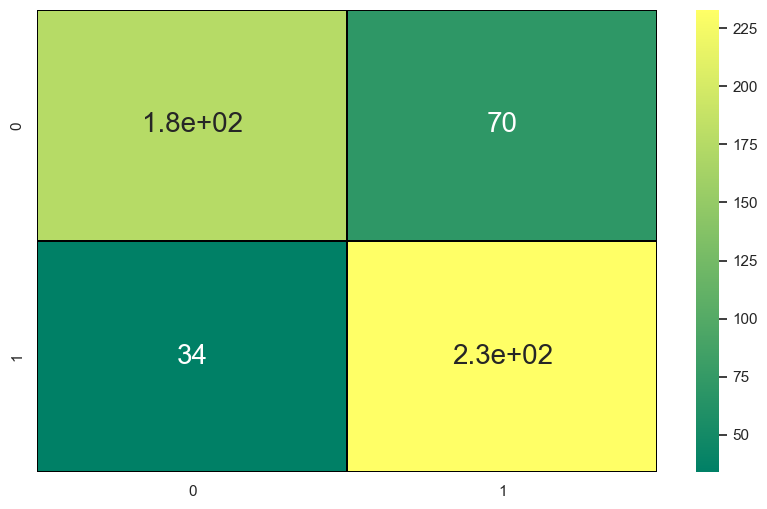

In [97]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=0.1, max_iter=1000, solver='saga')

model1=lr.fit(X_train,Y_train)

prediction_lr=model1.predict(X_test)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr.fit(X_train_scaled, Y_train)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,prediction_lr)
cm
sns.heatmap(cm, annot=True,cmap='summer',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]

print('Testing Accuracy for Logistic Regression:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for Logistic Regression:',(TP/(TP+FN)))
print('Testing Specificity for Logistic Regression:',(TN/(TN+FP)))
print('Testing Precision for Logistic Regression:',(TP/(TP+FP)))

In [98]:
prediction_lr.shape

(513,)

In [99]:
score_lr = round(accuracy_score(prediction_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 79.73 %


In [100]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.84      0.72      0.77       246
           1       0.77      0.87      0.82       267

    accuracy                           0.80       513
   macro avg       0.80      0.79      0.79       513
weighted avg       0.80      0.80      0.80       513



### From the above report, we get the accuracy of the Logistic Regression classifier is about 79.73%%.


### (B) Decision Tree


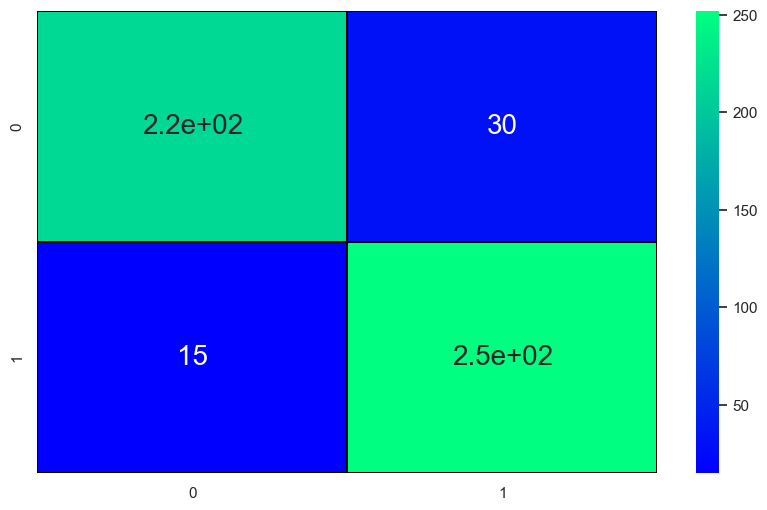

Testing Accuracy for Decision Tree: 0.9122807017543859
Testing Sensitivity for Decision Tree: 0.935064935064935
Testing Specificity for Decision Tree: 0.8936170212765957
Testing Precision for Decision Tree: 0.8780487804878049


In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
Y = data.target

tree_model = DecisionTreeClassifier(max_depth=5, criterion='entropy')
cv_scores = cross_val_score(tree_model, X_train, Y_train, cv=10, scoring='accuracy')
m = tree_model.fit(X_train, Y_train)

prediction_dt=m.predict(X_test)



cm = confusion_matrix(Y_test, prediction_dt)
sns.heatmap(cm, annot=True, cmap='winter', linewidths=0.3, linecolor='black', annot_kws={"size": 20})
plt.show()

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print('Testing Accuracy for Decision Tree:', (TP + TN) / (TP + TN + FN + FP))
print('Testing Sensitivity for Decision Tree:', TP / (TP + FN))
print('Testing Specificity for Decision Tree:', TN / (TN + FP))
print('Testing Precision for Decision Tree:', TP / (TP + FP))


In [102]:
print(classification_report(Y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       246
           1       0.89      0.94      0.92       267

    accuracy                           0.91       513
   macro avg       0.91      0.91      0.91       513
weighted avg       0.91      0.91      0.91       513



In [103]:
print(prediction_dt.shape)

(513,)


In [104]:
score_dt = round(accuracy_score(prediction_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 91.23 %


### From the above report, we get the accuracy of the Decision Tree classifier is about 91.23%.



### (C) Support Vector Machines

Testing Accuracy for SVM: 0.8440545808966862
Testing Sensitivity for SVM: 0.8772727272727273
Testing Specificity for SVM: 0.8191126279863481
Testing Precision for SVM: 0.7845528455284553


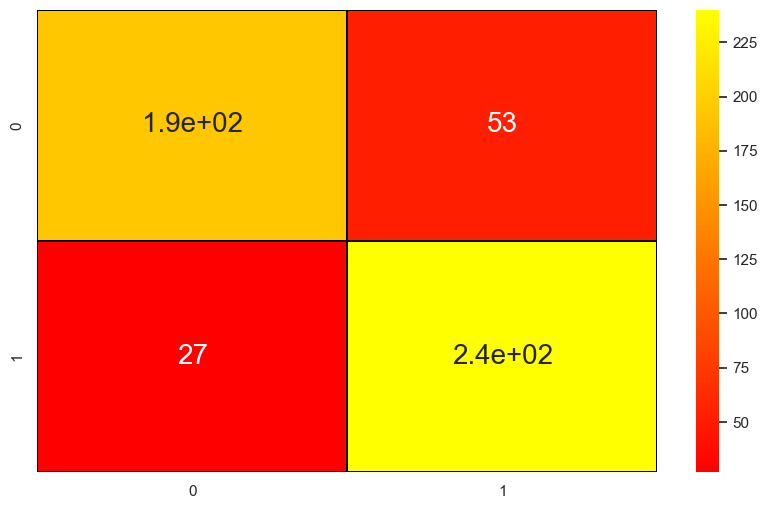

In [105]:
from sklearn.svm import SVC

svm=SVC(C=12,kernel='linear')

model_svm=svm.fit(X_train,Y_train)

prediction_svm=model_svm.predict(X_test)

cm_svm= confusion_matrix(Y_test,prediction_svm)

sns.heatmap(cm_svm, annot=True,cmap='autumn',linewidths=0.3, linecolor='black',annot_kws={"size": 20})
TP=cm_svm[0][0]
TN=cm_svm[1][1]
FN=cm_svm[1][0]
FP=cm_svm[0][1]
  
print('Testing Accuracy for SVM:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for SVM:',(TP/(TP+FN)))
print('Testing Specificity for SVM:',(TN/(TN+FP)))
print('Testing Precision for SVM:',(TP/(TP+FP)))

In [106]:
print(classification_report(Y_test, prediction_svm))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       246
           1       0.82      0.90      0.86       267

    accuracy                           0.84       513
   macro avg       0.85      0.84      0.84       513
weighted avg       0.85      0.84      0.84       513



In [107]:
print(prediction_svm.shape)

(513,)


In [108]:
score_svm = round(accuracy_score(prediction_svm,Y_test)*100,2)

print("The accuracy score achieved using Support Vector Machines is: "+str(score_svm)+" %")

The accuracy score achieved using Support Vector Machines is: 84.41 %


### From the above report, we get the accuracy of the Support Vector Machines classifier is about 84.41%.


## From the results that we got, as three machine learning algorithms like Logistic Regression, Decision Trees and Support Vector Machines. 

## From the final results, we got 
## ★*Logistic Regression as 79.73%*
## ★*Decision Trees as 91.23%* 
## ★*Support Vector Machines as 84.41%* . 

## We can conclude that the Decision Tree algorithm is the best algorithm for our model with the highest accuracy around 89.49 percent.



# 7. Output Final Score

In [109]:
scores = [score_lr,score_dt,score_svm]
algorithms = ["Logistic Regression","Decision Tree","Support Vector Machine"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 79.73 %
The accuracy score achieved using Decision Tree is: 91.23 %
The accuracy score achieved using Support Vector Machine is: 84.41 %


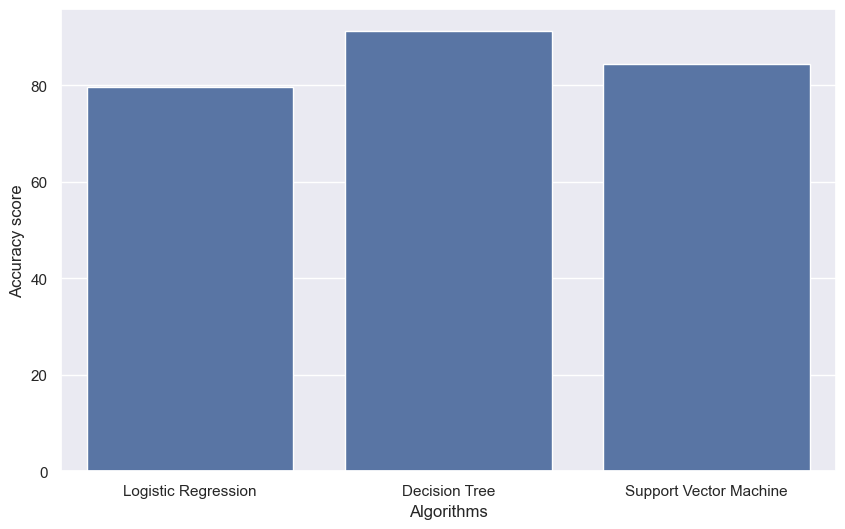

In [110]:
sns.set(rc={'figure.figsize':(10, 6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores) 
plt.show()

## 8. Final Model Implementation

### *Now, we can apply the best working algorithm (i.e., Decision Tree Classifier) into our model and check whether our model will result in the correct output or not with the help of available data.*



# CASE 1 – For Heart Disease data

In [111]:
input_data = (63, 3, 145, 233, 150, 2.3, 0, 0, 0, 0, 0, 0, 0)

input_as_numpy = np.asarray(input_data)
input_reshaped = input_as_numpy.reshape(1, -1)

pre1 = tree_model.predict(input_reshaped)

if pre1 == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be Normal :)")

The patient seems to have heart disease :(


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# CASE 2 – For Normal Data

In [112]:
input_data = (72, 1, 3, 125, 200, 0, 1, 150, 0, 1.3, 2, 1, 3)

input_as_numpy = np.asarray(input_data)
input_reshaped = input_as_numpy.reshape(1, -1)

pre1 = tree_model.predict(input_reshaped)
if pre1 == 1:
    print("The patient seems to have heart disease :(")
else:
    print("The patient seems to be Normal :)")

The patient seems to be Normal :)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 9. Conclusion

### Finally, we can conclude that real-time predictors will be essential in the healthcare sector nowadays.
### From this project, we will be able to predict real-time heart disease using the patient’s data from the model using the Decision Tree Algorithm, thereby making accurate heart disease prediction using machine learning.